In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()
# tells us mean age is  29.6
# tells us the standard deviation of fare is high, meaning the difference is high of the fare values from the mean. i.e, it is a dispursed data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


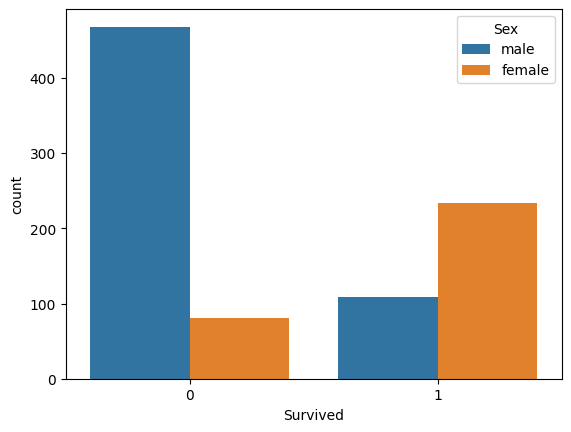

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived', hue='Sex')
plt.show()

#  this tells us majority of male did not survive where as females did.
#  i.e. Sex is a very strong predictor of survival!!

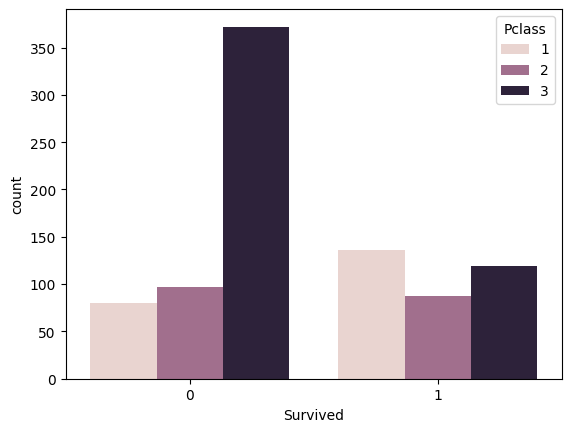

In [6]:
# let's see if the ticket class affect the survival rate or not?

sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()

# it tells us high amount of class 3 did not survive.
# and passengers from the first class did survive. Pclass another strong predictor

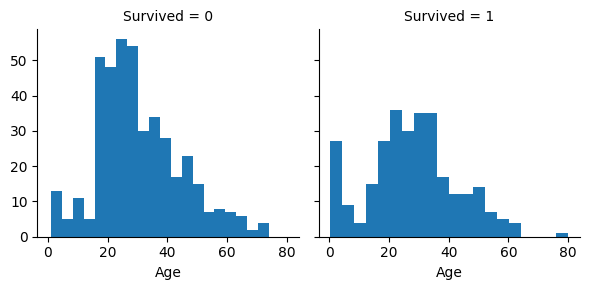

In [7]:
# sns.countplot(data=df, x='Survived', hue='Age')
# plt.show()

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

# there is a small spike in the second plot, meaning small children had a high chance of survival.

In [8]:
# after visuailziing some information about the dataframe now we clean it. 

meadian_age = df['Age'].median()

# df['Age'].fillna(meadian_age, inplace=True)
df.loc[:, 'Age'] = df['Age'].fillna(meadian_age)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# because the cabin column have too many missing values, it's better to just drop it
# is wasn't gonna be of a use anyway*

df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
# ML models are mathematical, they don't understand text like male of female.
# we need to convert these categorical features into numbers.

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [14]:
# for Embarked 2 missing values, we will fill with the most common port S and then map each port to a number

most_common_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_port, inplace=True)

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

/var/folders/vc/6mqvb_cd2rb2ttbbynp6k9s80000gn/T/ipykernel_36820/3789014097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_port, inplace=True)


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [16]:
# the name column and the ticket are unique to each passenger hence aren't useful to use for the generalized model.
# so we drop them.

df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
# the age and embarked cloumn missing values have been replaced, [cabin, ticket, name] columns have be dropped.
# all the other values have been converted to int/float for mathematical purposes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [19]:
# first we'll seperate features and target

# features
X = df.drop('Survived', axis=1)

# target
y = df['Survived']

In [20]:
# spliting the data into training set and testing set.

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.2 means 20% of data is for testing
# random_state=42 ensures we get the same split every time we run the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,0,45.5,0,0,28.5000,0
733,734,2,0,23.0,0,0,13.0000,0
382,383,3,0,32.0,0,0,7.9250,0
704,705,3,0,26.0,1,0,7.8542,0
813,814,3,1,6.0,4,2,31.2750,0


In [22]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [23]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,710,3,0,28.0,1,1,15.2458,1
439,440,2,0,31.0,0,0,10.5000,0
840,841,3,0,20.0,0,0,7.9250,0
720,721,2,1,6.0,0,1,33.0000,0
39,40,3,1,14.0,1,0,11.2417,1


In [24]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [25]:
# we'll train the first model and we'll go with the classic Logistic Regression
# despite the name, it is for classification.

from sklearn.linear_model import LogisticRegression

# creating an instance of the model
model = LogisticRegression(max_iter=500)

# training the model by .fit() this is where the learning happens, where we feed the training data in the model
model.fit(X_train, y_train)

# In that single .fit() command, the model analyzed the training data and learned the relationships between passenger features and survival. 
# It has created an internal set of rules based on the patterns it found.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [26]:
# we'll make predictions to see how well the model is.

predictions = model.predict(X_test)

# predictions variable now holds our model's best guess for each passenger in the test set

In [27]:
# now we'll actually check the accuracy of our model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(f"model accuracy: {accuracy:.2f}")

# 0.8 accuracy tell us that out model correctly predicted fate of 80% passengers in the test set.
# the confusion matrix will give us more detailed look of mistakes our model is making

model accuracy: 0.80


In [28]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

print(type(conf_matrix))
print("confusion matrix: ")
print(conf_matrix)

# [ TN, FP ]
# [ FN, TP ]


<class 'numpy.ndarray'>
confusion matrix: 
[[89 16]
 [20 54]]


In [29]:
# This tells us our model is good at identifying passengers who didn't survive, 
# but it's a bit less certain about those who did.

# now this was the first model. we built the basic model. now to get the better accuracy score, we need to make our model better by tweaking it

In [30]:
# let's now upgrade out model to random forest.

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predctions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predctions)

print(f"random forest accuracy: {rf_accuracy:.2f}")

random forest accuracy: 0.83


In [31]:
# 83 is better than 80
rf_matrix = confusion_matrix(y_test, rf_predctions)

print("random forest confusion matrix: ")
print(rf_matrix)

random forest confusion matrix: 
[[93 12]
 [18 56]]


In [32]:
# now we tune the model even more to get more out of the model
# we tune the hyperparameters using Grid Search and Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth' : [5, 10, 15],
              'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

print(f"best parameter found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"final tuned model's accuracy: {final_accuracy:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best parameter found: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
final tuned model's accuracy: 0.80


In [33]:
from sklearn.model_selection import GridSearchCV

# 1. Define the grid of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Set up the Grid Search
# The model is rf_model, param_grid is our settings, cv=5 is for 5-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=1) # verbose shows progress

# 3. Run the Grid Search on our training data
# This can take a few minutes as it's training many models!
grid_search.fit(X_train, y_train)

# 4. Get the best parameters and make final predictions
print(f"Best Parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Tuned Random Forest Accuracy: {final_accuracy:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.80
